In [5]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 7.4 MB/s eta 0:00:01


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

Token = os.getenv('NEPTUNE_TOKEN')

In [3]:
import neptune
import pandas as pd 
import plotly.graph_objects as go

run = neptune.init(project_qualified_name = 'keshav1998/student-performance-analysis', api_token=Token)

In [30]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [69]:
df = pd.read_csv('Data/StudentsPerformance.csv')
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [70]:
df[['math score','reading score','writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [4]:
groupe_math_eth = df.groupby(['race/ethnicity'])['math score'].sum().reset_index()
groupe_reading_eth = df.groupby('race/ethnicity')['reading score'].sum().reset_index()
groupe_writing_eth = df.groupby('race/ethnicity')['writing score'].sum().reset_index()

In [6]:
fig = go.Figure(data=[
    go.Bar(name='Math Score', x=groupe_math_eth['race/ethnicity'], y=groupe_math_eth['math score']),
    go.Bar(name='Reading Score', x=groupe_reading_eth['race/ethnicity'], y=groupe_reading_eth['reading score']),
    go.Bar(name='Writing Score', x=groupe_writing_eth['race/ethnicity'], y=groupe_writing_eth['writing score'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [7]:
groupe_math_gen = df.groupby(['gender'])['math score'].sum().reset_index()
groupe_reading_gen = df.groupby('gender')['reading score'].sum().reset_index()
groupe_writing_gen = df.groupby('gender')['writing score'].sum().reset_index()

fig = go.Figure(data=[
    go.Bar(name='Math Score', x=groupe_math_gen['gender'], y=groupe_math_gen['math score']),
    go.Bar(name='Reading Score', x=groupe_reading_gen['gender'], y=groupe_reading_gen['reading score']),
    go.Bar(name='Writing Score', x=groupe_writing_gen['gender'], y=groupe_writing_gen['writing score'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [13]:
df['overall_score'] = df['math score']+df['reading score']+df['writing score']
df = df.drop(columns=['math score', 'reading score', 'writing score'])

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

features = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
target = df['math score']

In [54]:
target

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

## Transforming Dataset

In [20]:
features

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [55]:
features['gender'] = features['gender'].astype('string')
features['race/ethnicity'] = features['race/ethnicity'].astype('string')
features['parental level of education'] = features['parental level of education'].astype('string')
features['test preparation course'] = features['test preparation course'].astype('string')

/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/1959719676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['gender'] = features['gender'].astype('string')
/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/1959719676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['race/ethnicity'] = features['race/ethnicity'].astype('string')
/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/1959719676.py:3: SettingWithCopyWarning: 
A value is trying to b

### ENCODING GENDER

In [ ]:
df['gender'] = df['gender'].map({'female':0, 'male':1}).astype(int)

In [56]:
features.loc[features['gender'] == 'male', 'gender'] = '0'
features.loc[features['gender'] == 'female', 'gender'] = '1'

features['gender'] = features['gender'].astype('int')

/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/3095041446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['gender'] = features['gender'].astype('int')


### ENCODING PARENT EDUCATION LEVEL

In [57]:
features['parental level of education'].unique()

<StringArray>
[ "bachelor's degree",       'some college',    "master's degree",
 "associate's degree",        'high school',   'some high school']
Length: 6, dtype: string

In [63]:
features.loc[features['parental level of education'] == 'high school', 'parental level of education'] = '1'
features.loc[features['parental level of education'] == 'some college', 'parental level of education'] = '2'
features.loc[features['parental level of education'] == 'some high school', 'parental level of education'] = '3'
features.loc[features['parental level of education'] == 'associate\'s degree', 'parental level of education'] = '4'
features.loc[features['parental level of education'] == 'bachelor\'s degree', 'parental level of education'] = '5'
features.loc[features['parental level of education'] == 'master\'s degree', 'parental level of education'] = '6'

features['parental level of education'] = features['parental level of education'].astype('int')

### ENCODING LUNCH ACCESS

In [58]:
features.loc[features['lunch'] == 'standard', 'lunch'] = '0'
features.loc[features['lunch'] == 'free/reduced', 'lunch'] = '1'

features['lunch'] = features['lunch'].astype('int')

/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/1264699270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['lunch'] = features['lunch'].astype('int')


### ENCODING PREP COURSE FLAG

In [59]:
features.loc[features['test preparation course'] == 'none', 'test preparation course'] = '0'
features.loc[features['test preparation course'] == 'completed', 'test preparation course'] = '1'

features['test preparation course'] = features['test preparation course'].astype('int')

/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/3923051018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['test preparation course'] = features['test preparation course'].astype('int')


In [60]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(features[['race/ethnicity']])
features[ohe.categories_[0]] = transformed.toarray()

features.head()

# features['race/ethnicity'].unique()

/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/3699844192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[ohe.categories_[0]] = transformed.toarray()
/var/folders/31/5sqnxmp50654hx6b98wty7xc0000gn/T/ipykernel_1951/3699844192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[ohe.categories_[0]] = transformed.toarray()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,group A,group B,group C,group D,group E
0,1,group B,bachelor's degree,0,0,0.0,1.0,0.0,0.0,0.0
1,1,group C,some college,0,1,0.0,0.0,1.0,0.0,0.0
2,1,group B,master's degree,0,0,0.0,1.0,0.0,0.0,0.0
3,0,group A,associate's degree,1,0,1.0,0.0,0.0,0.0,0.0
4,0,group C,some college,0,0,0.0,0.0,1.0,0.0,0.0


In [61]:
features = features.drop(columns=['race/ethnicity'])

## Modelling Prep


In [31]:
features.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
gender,1000.0,0.0,518.0,0.518,1.0,0.499926,0.249926,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
parental level of education,1000.0,0.0,3017.0,3.017,3.0,1.495643,2.236948,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0
lunch,1000.0,0.0,355.0,0.355,0.0,0.478753,0.229204,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
test preparation course,1000.0,0.0,358.0,0.358,0.0,0.479652,0.230066,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
group A,1000.0,0.0,89.0,0.089,0.0,0.284886,0.081160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
group B,1000.0,0.0,190.0,0.190,0.0,0.392497,0.154054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
group C,1000.0,0.0,319.0,0.319,0.0,0.466322,0.217456,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
group D,1000.0,0.0,262.0,0.262,0.0,0.439943,0.193550,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
group E,1000.0,0.0,140.0,0.140,0.0,0.347161,0.120521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [64]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   parental level of education  1000 non-null   int64  
 2   lunch                        1000 non-null   int64  
 3   test preparation course      1000 non-null   int64  
 4   group A                      1000 non-null   float64
 5   group B                      1000 non-null   float64
 6   group C                      1000 non-null   float64
 7   group D                      1000 non-null   float64
 8   group E                      1000 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 70.4 KB


In [65]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123)

In [66]:

model = xgb.XGBRegressor( 
                    max_depth = 7,
                    min_child_weight = 12,
                    learning_rate = 0.08,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=75
                    )

eval_set = [(x_test, y_test)]
model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)

[0]	validation_0-mae:61.64396
[1]	validation_0-mae:56.88509
[2]	validation_0-mae:52.50987
[3]	validation_0-mae:48.50548
[4]	validation_0-mae:44.80655
[5]	validation_0-mae:41.42847
[6]	validation_0-mae:38.35646
[7]	validation_0-mae:35.51721
[8]	validation_0-mae:32.97604
[9]	validation_0-mae:30.59017
[10]	validation_0-mae:28.44178
[11]	validation_0-mae:26.52506
[12]	validation_0-mae:24.76242
[13]	validation_0-mae:23.15776
[14]	validation_0-mae:21.78751
[15]	validation_0-mae:20.56799
[16]	validation_0-mae:19.50413
[17]	validation_0-mae:18.53588
[18]	validation_0-mae:17.69135
[19]	validation_0-mae:16.94865
[20]	validation_0-mae:16.23902
[21]	validation_0-mae:15.62515
[22]	validation_0-mae:15.06422
[23]	validation_0-mae:14.59667
[24]	validation_0-mae:14.20415
[25]	validation_0-mae:13.83678
[26]	validation_0-mae:13.51269
[27]	validation_0-mae:13.24951
[28]	validation_0-mae:13.02072
[29]	validation_0-mae:12.81014
[30]	validation_0-mae:12.66562
[31]	validation_0-mae:12.49363
[32]	validation_0-

/Volumes/T7/ML/minicoda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Volumes/T7/ML/minicoda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-mae:11.39545
[60]	validation_0-mae:11.38965
[61]	validation_0-mae:11.38530
[62]	validation_0-mae:11.37948
[63]	validation_0-mae:11.38622
[64]	validation_0-mae:11.37641
[65]	validation_0-mae:11.36877
[66]	validation_0-mae:11.36348
[67]	validation_0-mae:11.36286
[68]	validation_0-mae:11.36581
[69]	validation_0-mae:11.39956
[70]	validation_0-mae:11.38993
[71]	validation_0-mae:11.42004
[72]	validation_0-mae:11.45073
[73]	validation_0-mae:11.45849
[74]	validation_0-mae:11.43974


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=12,
             missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
target

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: overall_score, Length: 1000, dtype: int64

In [35]:
y_test

131    130
203    194
50     156
585    217
138    192
      ... 
556    206
598    219
458    300
586    201
178    184
Name: overall_score, Length: 300, dtype: int64

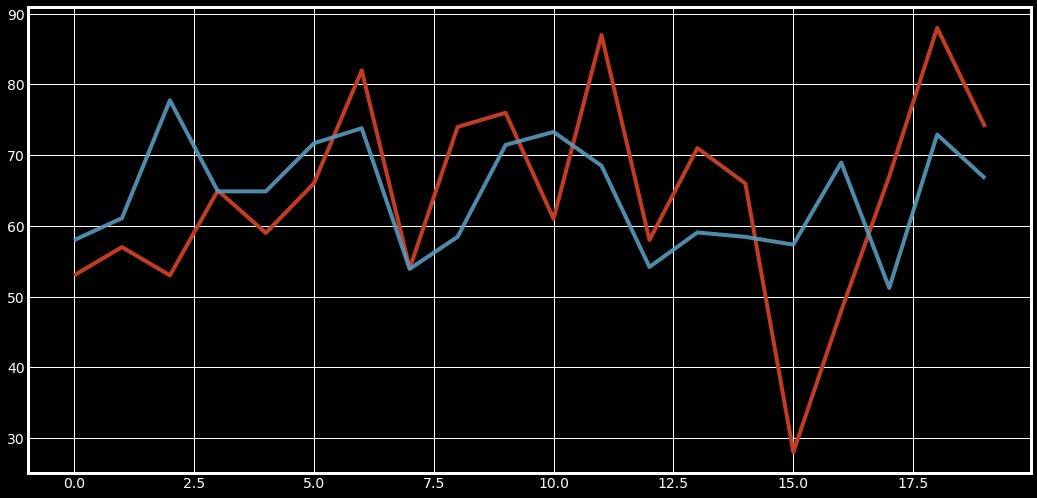

In [67]:
import matplotlib.pyplot as plt

plt.style.use(['fivethirtyeight', 'dark_background'])

# Above not useful, keshav pagal hai usko ache colour chahiye the

plt.figure(figsize=(16,8))
plt.plot(y_test.values[:20], color='#C23B23' )
y_pred = model.predict(x_test)
plt.plot(y_pred[:20], color='#579ABE', alpha = 0.9 )
plt.show()

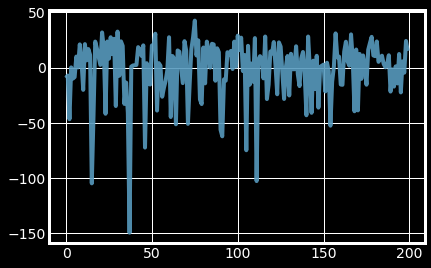

In [68]:
residual_per = ((y_test.values-y_pred)/y_test.values)*100
plt.plot(residual_per, color='#579ABE', alpha = 0.9 )
plt.show()

In [47]:
residual_per

131   -28.790048
203    -0.489233
50    -32.126451
585     5.340000
138    -6.985521
         ...    
556    -8.806714
598     6.087414
458    24.868378
586     2.570931
178   -26.928213
Name: overall_score, Length: 300, dtype: float64